1. 온라인 활동로그란?
* 다양한 분야에서 다양한 용어로 사용된다.
* UAM(User Activity Monitoring)/UBM(User Behavior Monitoring)
* Clickstream Analysis
* * 가트너의 용어 정의: https://www.gartner.com/en/information-technology/glossary/clickstream-analysis
* Event Stream: https://www.youtube.com/watch?v=hMWyE3HBwW4 (특히 7:32초 비교표 참조)
* Activity Stream
* 비고: 동영상 스트리밍과는 다른 개념!
1. 1. Google Analytics, Adobe Analytics
* 구글애널리틱스 6분내로 끝내기 https://www.youtube.com/watch?v=9uQC6qz3NG8
* Adobe Analytics: https://www.youtube.com/watch?v=Y2Jo43NM-Oo
1. 2.  Activity Streams
* W3C 표준 : https://www.w3.org/TR/activitystreams-core/
* 표준 구현 예제: https://www.w3.org/2010/05/video/mediaevents.html
1. 2.  Learning Analytics
* Learning Analytics in a nutshell https://youtu.be/XscUZ8dIa-8
* xAPI : https://xapi.com/overview/?utm_source=google&utm_medium=natural_search
* xAPI 설명 자료(한국 개발자): https://www.youtube.com/watch?v=G4usWOI00Nk
* IMS Caliper: https://www.imsglobal.org/activity/caliper

2. 활동로그(학습활동) 샘플분석

In [1]:
import pandas as pd

Entity Data / Event Data  
현재의 상태만 저장됨 / 모든 이벤트를 기록함  
Web log / Event Data  
아이피만 기록됨(계정상태까지는 알 수 없음) / 계정 아이디까지 같이 기록  
5년동안 Event Data를 기록한 회사의 경우 데이터가 굉장히 복잡해져서 비정형데이터가 된다

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/activity_sample.csv")

In [80]:
df2 = pd.read_csv("C:/Users/user/Downloads/activity_sample.csv")

In [3]:
df

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,day_23_status,day_24_status,day_25_status,day_26_status,day_27_status,day_28_status,day_29_status,day_30_status,day_31_status,change_date
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,ViewEvent,Viewed,DigitalResource,2022-09-14 23:28:53.150,M,...,11,11,44,44,44,44,44,44,999,25
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:09.481,M,...,11,11,44,44,44,44,44,44,999,25
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:09.604,M,...,11,11,44,44,44,44,44,44,999,25
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:43.752,M,...,11,11,44,44,44,44,44,44,999,25
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:43.883,M,...,11,11,44,44,44,44,44,44,999,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,35,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.026,M,...,1,1,1,1,44,44,44,44,999,27
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,36,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:18.280,M,...,1,1,1,1,44,44,44,44,999,27
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,37,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.366,M,...,1,1,1,1,44,44,44,44,999,27
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,38,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:40.089,M,...,1,1,1,1,44,44,44,44,999,27


In [4]:
df['change_date'].unique()

array([25, 27, 19, 18, 20, 29, 30, 16, 21, 28, 22, 24], dtype=int64)

2. 1. 프로파일링 / 탐색적 분석

In [5]:
# 전체 컬럼명 확인
df.columns

Index(['Unnamed: 0', 'userid', 'learning_seq', 'mcode', 'learning_action_seq',
       'event_type', 'action', 'object_type', 'timestamp', 'gender', 'grade',
       'memberstatus', 'memberstatus_change', 'day_01_status', 'day_02_status',
       'day_03_status', 'day_04_status', 'day_05_status', 'day_06_status',
       'day_07_status', 'day_08_status', 'day_09_status', 'day_10_status',
       'day_11_status', 'day_12_status', 'day_13_status', 'day_14_status',
       'day_15_status', 'day_16_status', 'day_17_status', 'day_18_status',
       'day_19_status', 'day_20_status', 'day_21_status', 'day_22_status',
       'day_23_status', 'day_24_status', 'day_25_status', 'day_26_status',
       'day_27_status', 'day_28_status', 'day_29_status', 'day_30_status',
       'day_31_status', 'change_date'],
      dtype='object')

In [6]:
# member, memberstatus_change
# 11: 정회원
# 11이 아닌 모든 값들: 정회원이 아님(이탈, 만료, 미납, 중지 등)
# 44: 만료/이탈 회원
df['memberstatus_change'].unique()

# 예시 설명
# 11, 44: 정회원 -> 이탈
# -,00,01,44: 회원가입 -> 비회원상태 -> 이탈

array(['11,44', '-,00,01,44', '00,01,44', '11,55,44', '-,02,01,44',
       '00,11,44'], dtype=object)

In [7]:
# 전체 레코드(rows) 수 확인
df.shape
# (6476/30)*1.5*10000(회원수 가정) = 3238000.0
# 6476/30 한 회원당 데이터 수
# 대략 만명의 회원이 있을 때 한달동안 3238천개 데이터가 쌓임

(6476, 45)

In [8]:
# 고유(unique) 유저 리스트 및 고유 유저수 확인
df['userid'].unique()

array(['01cf7916-eb98-4d30-8c81-dd52aa5be060',
       '076bf224-16b8-48ca-b646-752a771b1dcc',
       '2bd83b70-6085-48d1-8433-6bef1f4fa584',
       '3a23c7e1-861a-41ce-a856-f16a4df5a5df',
       '4e478763-9937-4d47-b7da-a0113f860b52',
       '4ef416c9-de60-499e-b971-a780e076991e',
       '5b531894-59c3-4cf3-8fa4-eb1836fbd6b3',
       '676a004e-7c59-4edb-8af1-3bd963b98b29',
       '78d436d5-2adb-489b-bc1c-8c5b85d47d5c',
       '7aa6cf37-81af-4af8-a272-6a850e65e25c',
       '909c25d9-64ef-4e4f-b47f-4df50f02c07f',
       '91749c9e-af85-4f73-b252-2d05c04b508f',
       '943ee87d-d6d7-4ad4-b7dd-4ca171d8107e',
       'a11ea25b-593c-45f4-8c68-8e97b489e53a',
       'a130415d-5d44-4526-94bd-1a0892811572',
       'a3c0a30d-346f-4b58-967b-70ae79302871',
       'a9c80240-7734-401d-bddf-999d869e42a1',
       'b2d3b8c4-e954-4ed2-9078-c6c5493debea',
       'b3ddd47d-5c6f-44ba-9bd6-ff698a742f73',
       'b6d4d557-7343-4b61-8f06-ebbee45a0a81',
       'b8be7534-636b-4304-b3b2-ced246c3c1eb',
       'c25b0

In [9]:
len(df['userid'].unique())

30

In [10]:
# 학년별 데이터 분포
df['grade'].unique()

array([5], dtype=int64)

In [11]:
type(df['grade'][1])

numpy.int64

In [12]:
df.groupby('grade').size()
# 모두 5학년

grade
5    6476
dtype: int64

In [13]:
# 이벤트 유형(event_type) 및 행동(action) 목록 파악
df['event_type'].unique()

array(['ViewEvent', 'NavigationEvent', 'MediaEvent'], dtype=object)

In [14]:
df['action'].unique()

array(['Viewed', 'NavigatedTo', 'Started', 'JumpedTo', 'Ended',
       'ChangedVolume', 'Restarted', 'ChangedSpeed', 'Paused', 'Resumed'],
      dtype=object)

In [15]:
df.groupby(['event_type', 'action']).size()

event_type       action       
MediaEvent       ChangedSpeed     1234
                 ChangedVolume     307
                 Ended             648
                 JumpedTo          687
                 Paused             51
                 Restarted          93
                 Resumed            32
                 Started           579
NavigationEvent  NavigatedTo      1095
ViewEvent        Viewed           1750
dtype: int64

In [16]:
user1 = df['userid'].unique()[0]
user1

'01cf7916-eb98-4d30-8c81-dd52aa5be060'

In [17]:
# 이벤트 유형별 분포(Histogram)
# 특정 유저 선택
user1 = df['userid'].unique()[0]

# 해당 유저의 데이터셋 추출
df[df['userid']==user1].groupby('action').size()

# quick quiz: ChangeSpeed 행동이 유저별로 몇건인지 Histogram 그려보자

action
Ended           6
JumpedTo        6
NavigatedTo    11
Started         6
Viewed         17
dtype: int64

In [18]:
user1 = df['userid'].unique()[15]
df[df['userid']==user1].groupby('action').size()

action
ChangedSpeed     90
ChangedVolume    25
Ended            12
JumpedTo         16
NavigatedTo      13
Paused            2
Restarted         1
Resumed           2
Started          10
Viewed           21
dtype: int64

<AxesSubplot:>

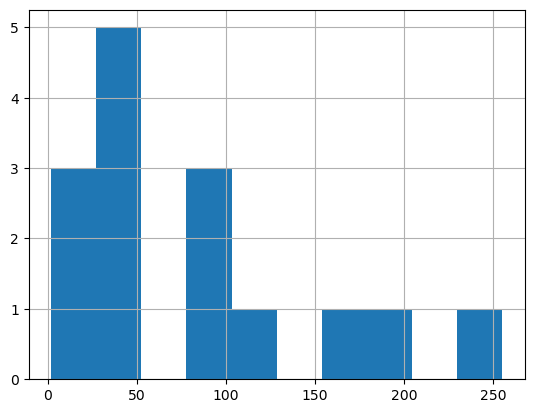

In [19]:
# quick quiz: ChangeSpeed 행동이 유저별로 몇건인지 Histogram 그려보자
speed_change = df[df['action']=='ChangedSpeed'].groupby('userid').size().reset_index(name='count')
speed_change['count'].hist()
# ChangedSpeed가 0건인 유저는 누락됨

In [36]:
# 행동별 분포(Histogram):
# 모든 행동에 대해서 위와 같이 유저별 분포를 자동화해서 뽑는 코드를 작성해보자
# 단일 plot에 여러 
import matplotlib.pyplot as plt

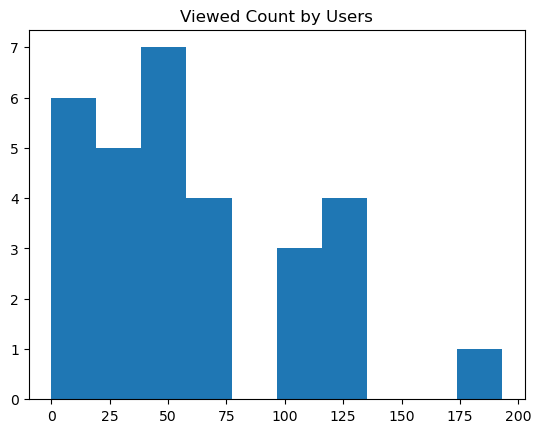

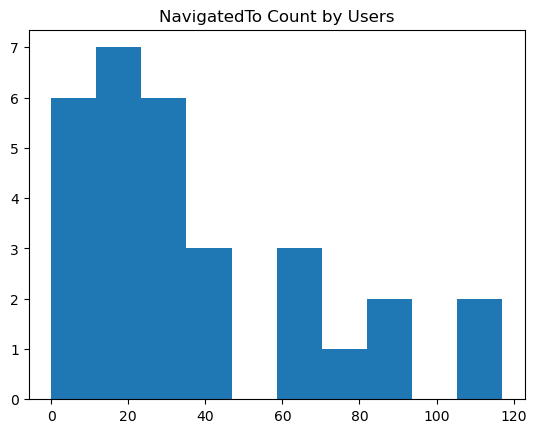

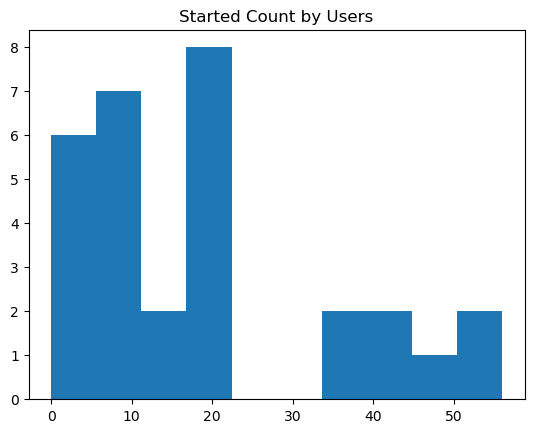

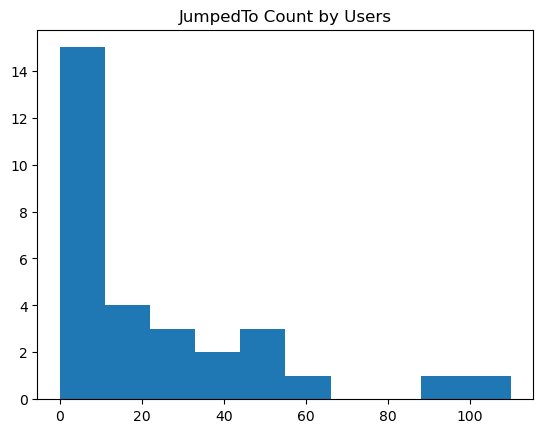

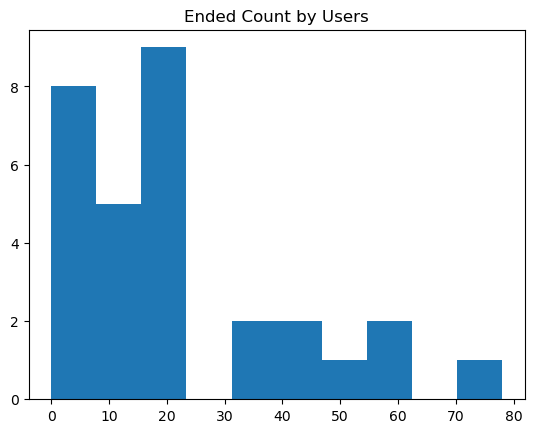

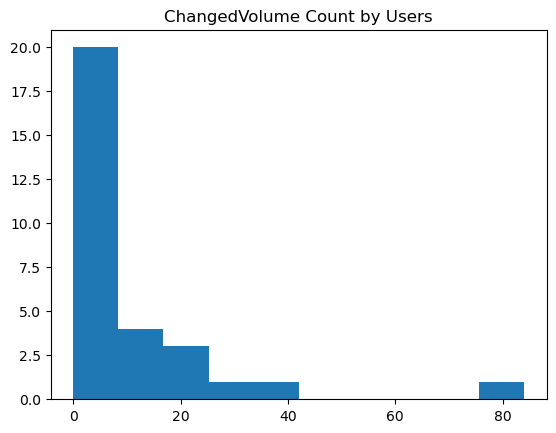

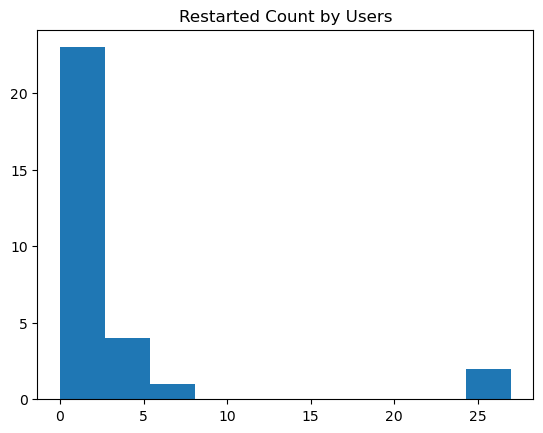

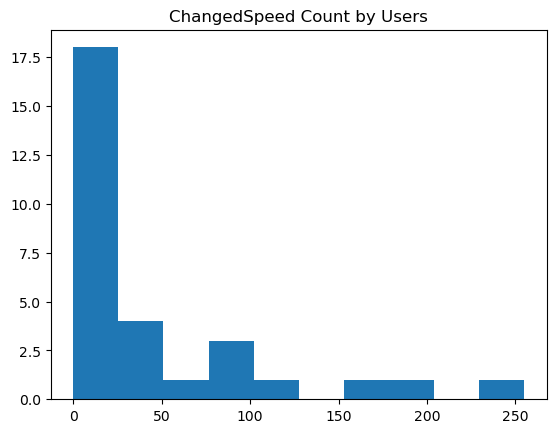

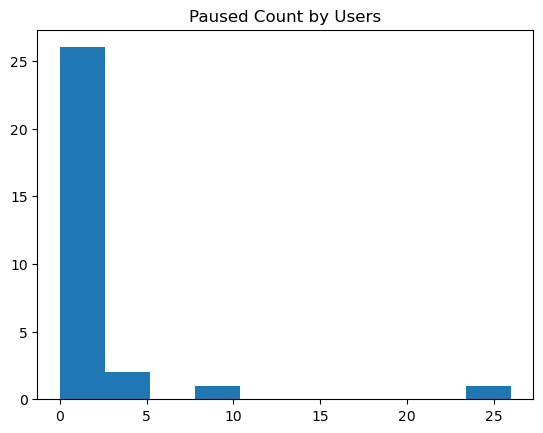

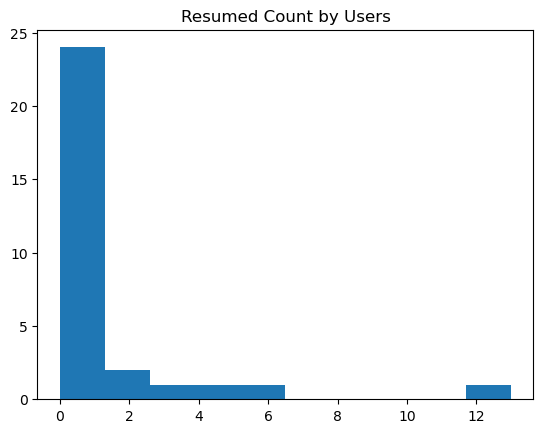

In [37]:
# 유저별로 반복하여 ChangedSpeed를 카운트 해야함
# 유저 ID 목록
user_list = df.userid.unique()

# 전체 action 목록
act_list = df.action.unique()

# 행동별/유저별 건수 집계 함수
# act: 행동 명을 인자로 받아서 처리한다

def user_act_counter(act):

    # 건수 저장 리스트
    cnt_list=[]

    for i in range(len(user_list)):

        # 각 유저별 행동로그 추출한 subset
        temp_df = df[df['userid']==user_list[i]]

        tmp_cnt = 0

        for action in temp_df['action']:
            if action == act : tmp_cnt +=1
            else: continue
        
        cnt_list.append(tmp_cnt)

    return(cnt_list)

# 함수가 도는지 테스트용
# plt.hist(user_act_counter('ChangedSpeed'))
# plt.title("ChangedSpeed Count by Users")

# 전체 플롯을 아래로 주욱 보여주는 방식
for i in range(len(act_list)):
    
    # 분포를 계산할 액션명을 추출한다.
    act_keyword = act_list[i]
    title = act_keyword+" Count by Users" #표 제목을 concate 한다.
    
    plt.hist(user_act_counter(act_keyword)) # 위에서 생성한 함수에 액션명을 인자로 전달한다.
    plt.title(title)
    plt.show()    

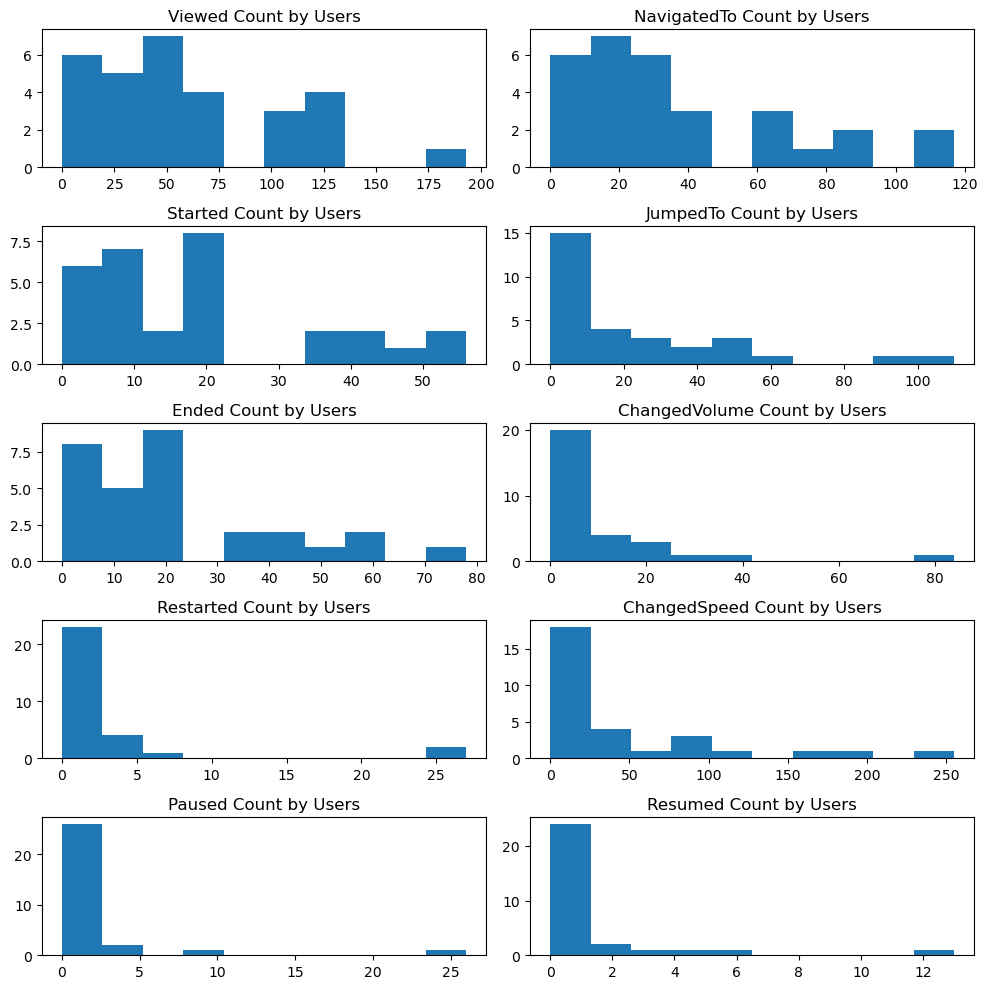

In [38]:
# 5 x 2 로 플롯을 한번에 작업하고 싶은 경우

plt.rcParams["figure.figsize"] = (10,10)

fig, axs = plt.subplots(5, 2)

for i in range(len(act_list)):

    act_keyword = act_list[i]
    title = act_keyword+" Count by Users" 

    x_axe = int(i/2)
    y_axe = i % 2

    axs[x_axe, y_axe].hist(user_act_counter(act_keyword))
    axs[x_axe, y_axe].set_title(title)
##
fig.tight_layout()


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

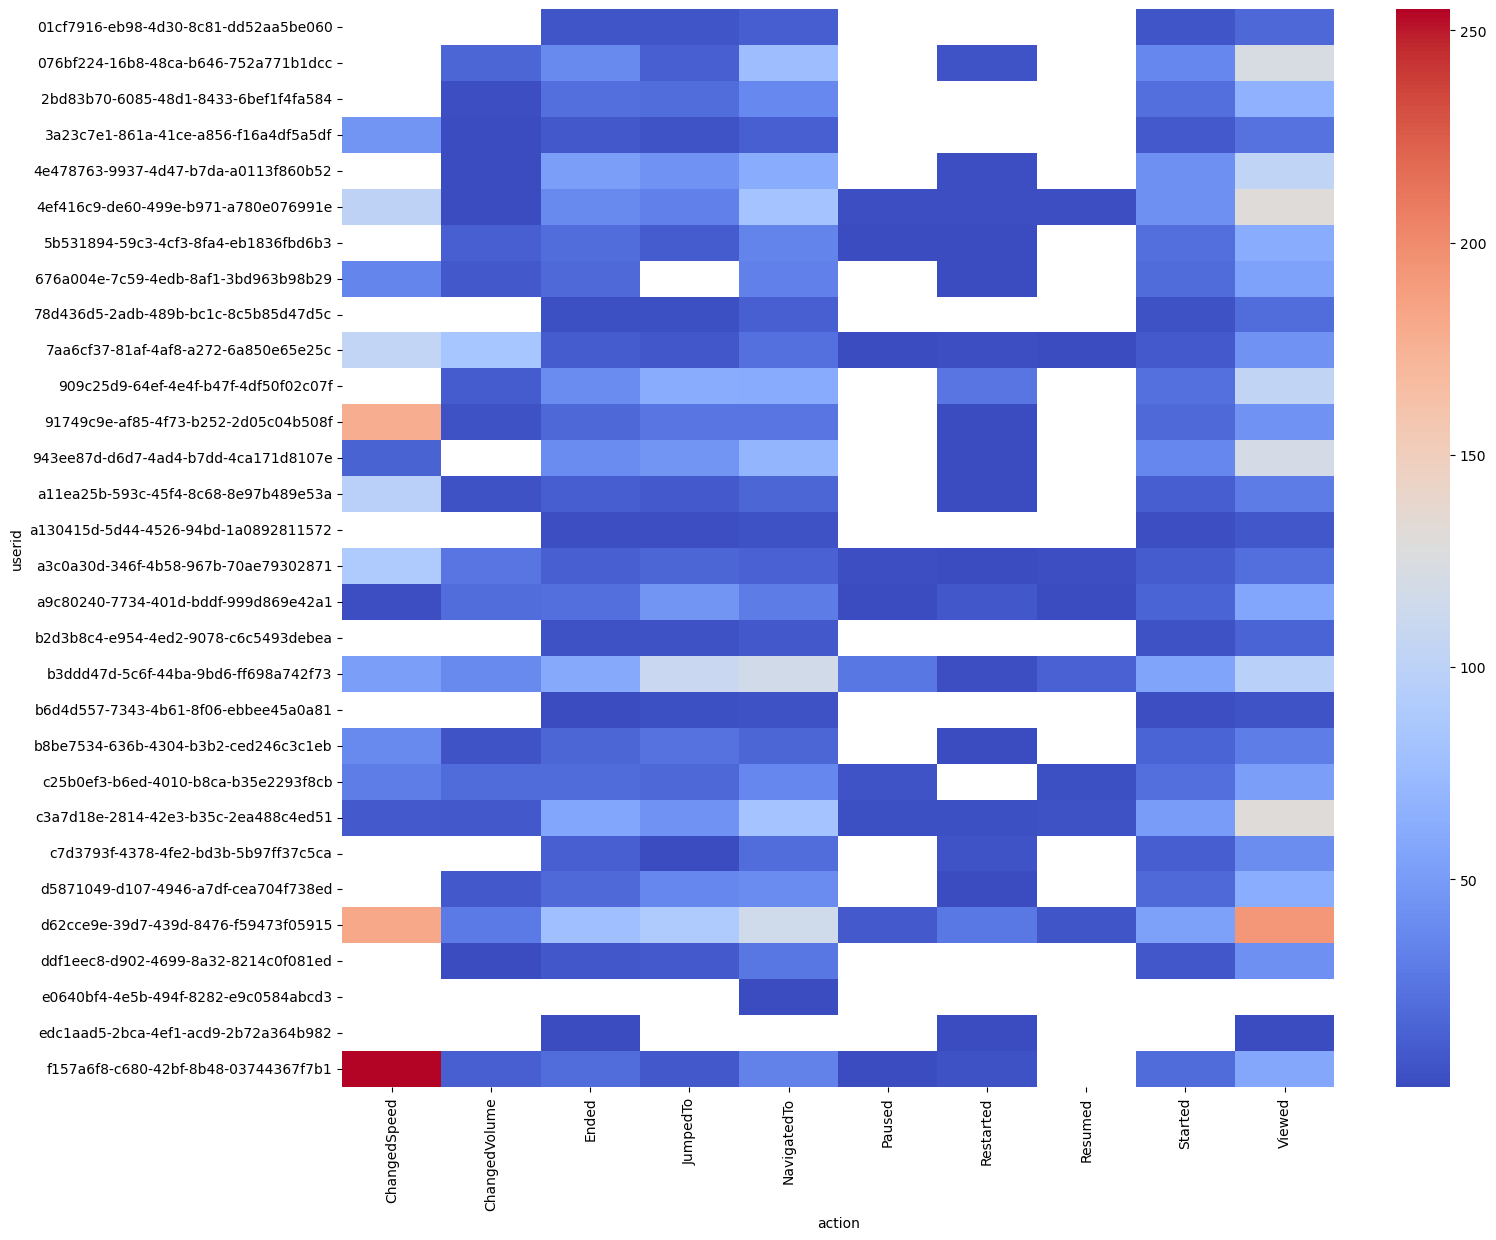

In [39]:
# 진준우님 히트맵 

import seaborn as sns

df2 = df.groupby(['userid','action']).size()
df3 = df2.unstack(level='action')

plt.figure(figsize=(16,14))
sns.heatmap(df3, cmap="coolwarm")
plt.xlabel('action')
plt.ylabel('userid')
plt.tight_layout

In [40]:
# 고유 mcode 개수
len(df.mcode.unique())

205

<AxesSubplot:>

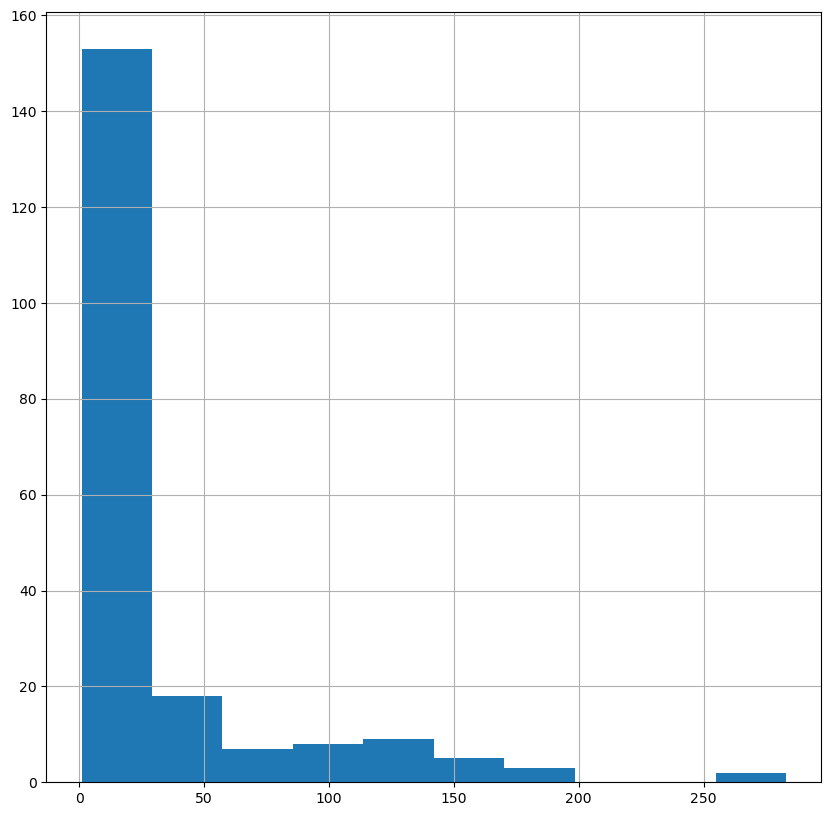

In [41]:
# 고유 mcode의 분포(Histogram)확인
df.groupby('mcode').size().hist()

In [42]:
# mcode 값의 평균 길이 확인
df['mcode'].apply(lambda x: len(x)).mean()

12.0

<AxesSubplot:>

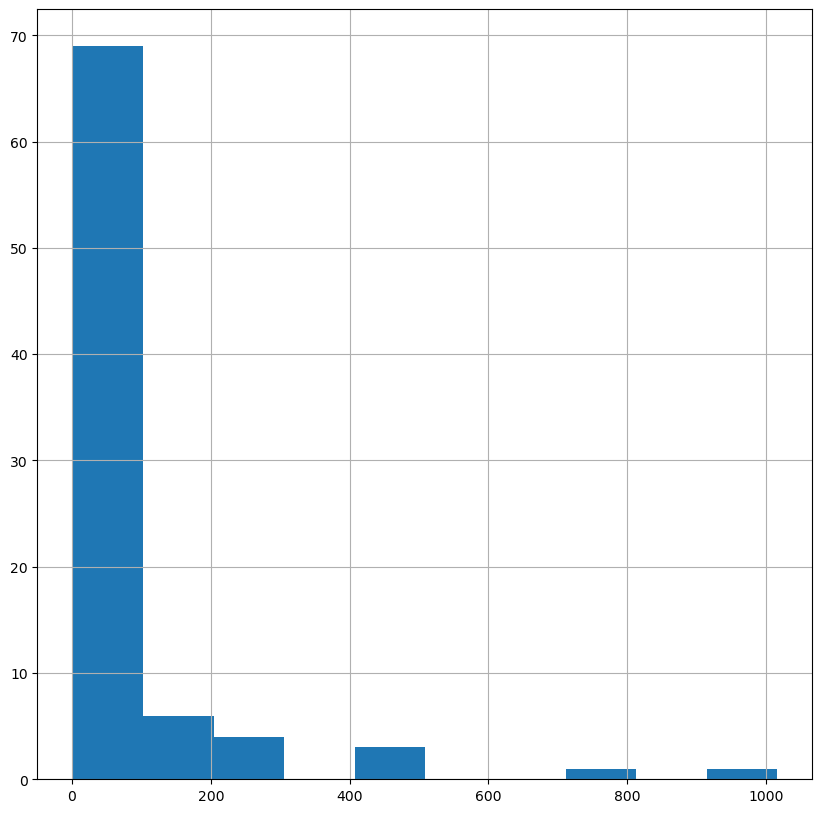

In [43]:
# mcode 처음 9자리를 한 단위로 할 경우 분포(Histogram)확인
df['course_code'] = df['mcode'].apply(lambda x: x[0:9])
df.groupby('course_code').size().hist()

Text(0.5, 1.0, 'Events Count Per Days')

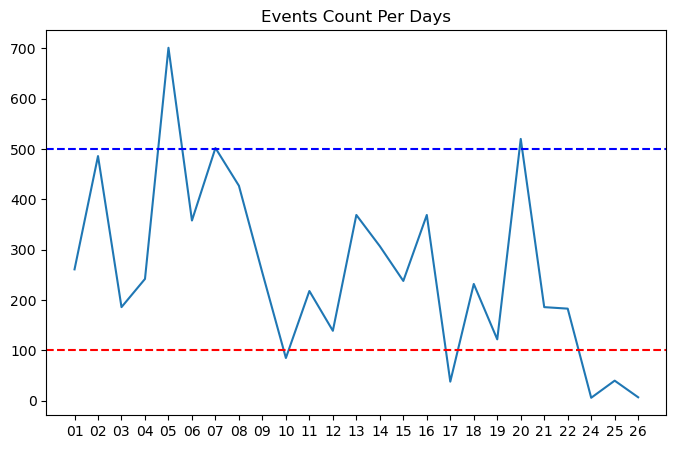

In [44]:
# 일자별 데이터 분포 확인

# 먼저 어떤 형인지 확인한다: type(df['timestamp'][0]) --> str 로 확인된다.

df['day_of_month'] = df['timestamp'].apply(lambda x: x[8:10])

plt.rcParams["figure.figsize"] = (8,5)

plt.plot(df.groupby('day_of_month').size())
plt.axhline(y=500, color='b', linestyle='--') # 뭔가 임계치를 보여주고 싶을 때 가로선을 추가
plt.axhline(y=100, color='r', linestyle='--')
plt.title("Events Count Per Days")

In [45]:
import datetime

date_time_str = '2018-06-29 08:15:27.243860'

date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

print('Date-time:', date_time_obj)


# Date-time: 2018-06-29 08:15:27.243860
def str_date(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')

Date-time: 2018-06-29 08:15:27.243860


In [46]:
df['timestamp'][0]

'2022-09-14 23:28:53.150'

In [79]:
type(df['timestamp'][0])

str

In [81]:
type(df2['timestamp'][0])

str

In [47]:
df['day'] = df['timestamp'].apply(lambda x: str_date(x))

In [48]:
df['day']

0      2022-09-14 23:28:53.150
1      2022-09-14 23:30:09.481
2      2022-09-14 23:30:09.604
3      2022-09-14 23:30:43.752
4      2022-09-14 23:30:43.883
                 ...          
6471   2022-09-21 10:26:18.026
6472   2022-09-21 10:26:18.280
6473   2022-09-21 10:26:18.366
6474   2022-09-21 10:26:40.089
6475   2022-09-21 10:26:40.484
Name: day, Length: 6476, dtype: datetime64[ns]

In [82]:
type(df['day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
df['day'][0].day

14

<AxesSubplot:xlabel='day_to'>

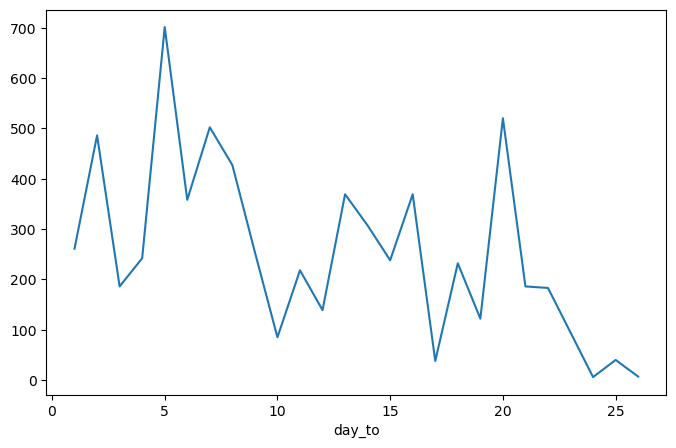

In [51]:
df['day_to'] = df['day'].apply(lambda x: x.day)
# df['day_to'] = df['day_to'].apply(lambda x: str(x))
plt.rcParams['figure.figsize'] = (8, 5)

df.groupby('day_to').size().plot()

In [52]:
df['day_to'][1]

14

In [53]:
type(df['day_to'][0])

numpy.int64

In [54]:
# 요일별 데이터 분포 확인

In [55]:
df['day'][0].weekday()
# 0 = MON

2

In [72]:
df['weekday'] = df['day'].apply(lambda x: x.weekday())

<AxesSubplot:>

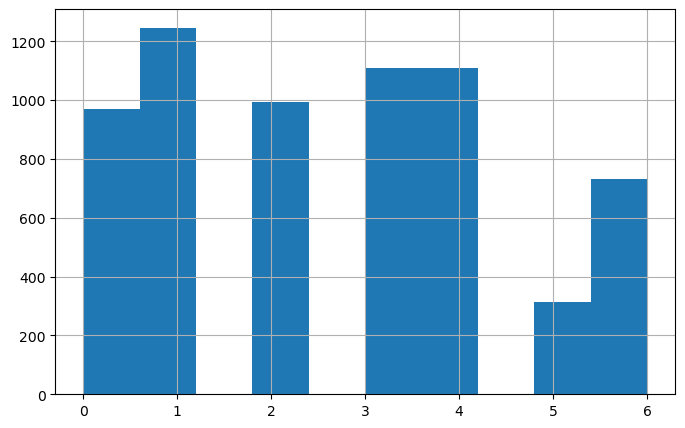

In [57]:
df['weekday'].hist()

In [58]:
df['weekday'].unique()

array([2, 3, 4, 6, 0, 1, 5], dtype=int64)

<AxesSubplot:xlabel='weekday'>

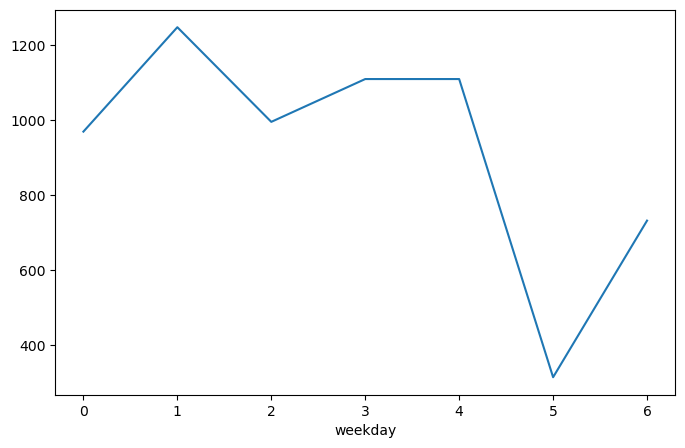

In [59]:
df.groupby('weekday').size().plot()

In [60]:
df['weekday']

0       2
1       2
2       2
3       2
4       2
       ..
6471    2
6472    2
6473    2
6474    2
6475    2
Name: weekday, Length: 6476, dtype: int64

In [85]:
# 요일별 데이터 분포 확인
import datetime
#from datetime import datetime

# 포멧 연습
# datetime.datetime.today()
#datetime.datetime(2023, 1, 1, 1, 1, 1, 173504).weekday()
# datetime.datetime.today().weekday()

# '2022-09-14 23:28:53.150'
# 'yyyy-mm-dd hh:mm:ss.mili'
# datetime.datetime.fromisoformat('2022-09-14 23:28:53.150').weekday()

df['weekday2'] = df['timestamp'].apply(lambda x: datetime.datetime.fromisoformat(x).weekday())
df[['timestamp', 'day_of_month', 'weekday', 'weekday2']].head(30)

,timestamp,day_of_month,weekday,weekday2
0,2022-09-14 23:28:53.150,14,2,2
1,2022-09-14 23:30:09.481,14,2,2
2,2022-09-14 23:30:09.604,14,2,2
3,2022-09-14 23:30:43.752,14,2,2
4,2022-09-14 23:30:43.883,14,2,2
5,2022-09-14 23:34:54.404,14,2,2
6,2022-09-14 23:35:09.916,14,2,2
7,2022-09-14 23:35:10.085,14,2,2
8,2022-09-14 23:35:22.575,14,2,2
9,2022-09-14 23:35:23.368,14,2,2


In [61]:
week_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday'] = df['weekday'].apply(lambda x: week_list[x])

<AxesSubplot:xlabel='weekday'>

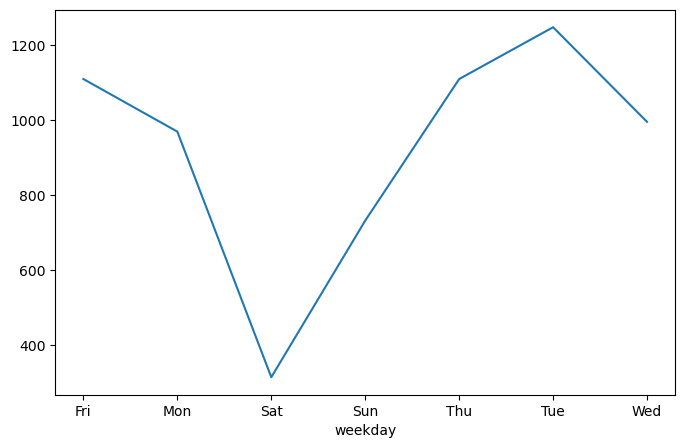

In [62]:
df.groupby('weekday').size().plot()

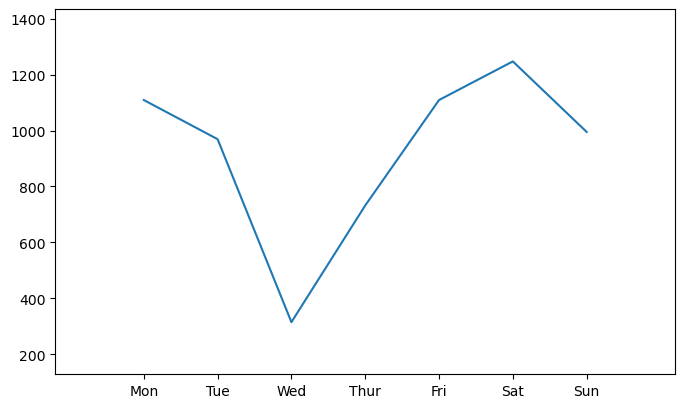

In [63]:
temp = df.groupby('weekday').size().reset_index(name='events')

x = temp['weekday']
y = temp['events']
labels = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]

plt.plot(x, y)

plt.xticks(x, labels)

plt.margins(0.2)

plt.subplots_adjust(bottom=0.15)
plt.show()

In [71]:
df['weekday']

0       Wed
1       Wed
2       Wed
3       Wed
4       Wed
       ... 
6471    Wed
6472    Wed
6473    Wed
6474    Wed
6475    Wed
Name: weekday, Length: 6476, dtype: object

In [73]:
weekday_list = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]

df['weekday_txt'] = df['weekday'].apply(lambda x: weekday_list[x])

df[['timestamp', 'day_of_month', 'weekday', 'weekday_txt']]

,timestamp,day_of_month,weekday,weekday_txt
0,2022-09-14 23:28:53.150,14,2,Wed
1,2022-09-14 23:30:09.481,14,2,Wed
2,2022-09-14 23:30:09.604,14,2,Wed
3,2022-09-14 23:30:43.752,14,2,Wed
4,2022-09-14 23:30:43.883,14,2,Wed
...,...,...,...,...
6471,2022-09-21 10:26:18.026,21,2,Wed
6472,2022-09-21 10:26:18.280,21,2,Wed
6473,2022-09-21 10:26:18.366,21,2,Wed
6474,2022-09-21 10:26:40.089,21,2,Wed


In [74]:
# 시간대별 데이터 분포 확인: '2022-09-14 23:28:53.150'

df['action_time'] = df['timestamp'].apply(lambda x: x[11:13])
df[['timestamp', 'day_of_month', 'weekday', 'weekday_txt', 'action_time']]

,timestamp,day_of_month,weekday,weekday_txt,action_time
0,2022-09-14 23:28:53.150,14,2,Wed,23
1,2022-09-14 23:30:09.481,14,2,Wed,23
2,2022-09-14 23:30:09.604,14,2,Wed,23
3,2022-09-14 23:30:43.752,14,2,Wed,23
4,2022-09-14 23:30:43.883,14,2,Wed,23
...,...,...,...,...,...
6471,2022-09-21 10:26:18.026,21,2,Wed,10
6472,2022-09-21 10:26:18.280,21,2,Wed,10
6473,2022-09-21 10:26:18.366,21,2,Wed,10
6474,2022-09-21 10:26:40.089,21,2,Wed,10


<AxesSubplot:xlabel='action_time'>

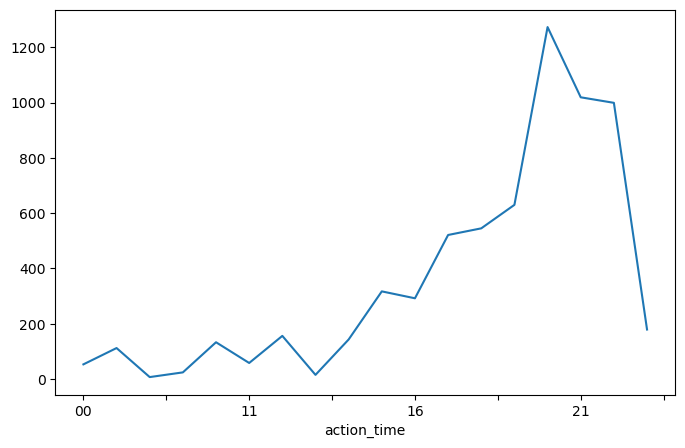

In [75]:
df.groupby('action_time').size().plot()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

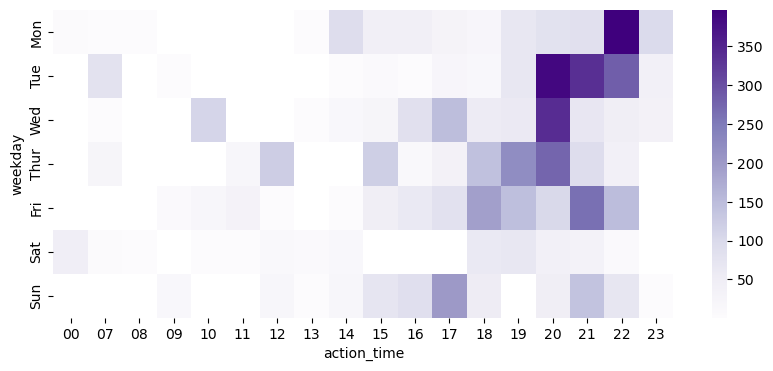

In [76]:
# 요일-시간대 히트맵
# x축에 시간대(0시~24시), y축에 요일(월~일)

import seaborn as sns

df2 = df.groupby(['weekday','action_time']).size()
df3 = df2.unstack(level='action_time')

plt.figure(figsize=(10,4))
plot = sns.heatmap(df3, cmap="Purples")
plot.set_yticklabels(labels)

plt.xlabel('action_time')
plt.ylabel('weekday')

plt.tight_layout


In [77]:
df3

action_time,00,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,
0,7.0,1.0,3.0,NaN,NaN,NaN,NaN,3.0,91.0,44.0,44.0,29.0,22.0,67.0,80.0,83.0,397.0,98.0
1,NaN,79.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,9.0,4.0,22.0,15.0,67.0,387.0,338.0,283.0,41.0
2,NaN,2.0,NaN,NaN,109.0,NaN,NaN,2.0,15.0,24.0,83.0,149.0,56.0,61.0,340.0,69.0,48.0,37.0
3,NaN,23.0,NaN,NaN,NaN,21.0,122.0,NaN,NaN,120.0,12.0,38.0,143.0,222.0,276.0,91.0,41.0,NaN
4,NaN,NaN,NaN,8.0,21.0,33.0,1.0,NaN,1.0,48.0,62.0,82.0,192.0,146.0,102.0,263.0,150.0,NaN
5,46.0,7.0,4.0,NaN,3.0,4.0,13.0,9.0,15.0,NaN,NaN,NaN,62.0,67.0,40.0,35.0,10.0,NaN
6,NaN,NaN,NaN,15.0,NaN,NaN,20.0,1.0,20.0,72.0,87.0,201.0,55.0,NaN,48.0,140.0,70.0,3.0


In [95]:
# 유저별로 이탈일자 확인(비고: change_date 확인)
# id, change data 만 추출 후 --> drop_duplicate --> groupby change_date 
temp_df = df[['userid', 'change_date']]
temp_df = temp_df.drop_duplicates()
temp_df.groupby('change_date').size().reset_index(name='Churn')

,change_date,Churn
0,16,1
1,18,5
2,19,3
3,20,3
4,21,1
5,22,3
6,24,3
7,25,1
8,27,4
9,28,2


In [89]:
temp_df

,userid,change_date
0,01cf7916-eb98-4d30-8c81-dd52aa5be060,25
46,076bf224-16b8-48ca-b646-752a771b1dcc,27
352,2bd83b70-6085-48d1-8433-6bef1f4fa584,19
519,3a23c7e1-861a-41ce-a856-f16a4df5a5df,27
622,4e478763-9937-4d47-b7da-a0113f860b52,18
928,4ef416c9-de60-499e-b971-a780e076991e,18
1360,5b531894-59c3-4cf3-8fa4-eb1836fbd6b3,20
1521,676a004e-7c59-4edb-8af1-3bd963b98b29,19
1688,78d436d5-2adb-489b-bc1c-8c5b85d47d5c,29
1730,7aa6cf37-81af-4af8-a272-6a850e65e25c,30


In [90]:
# 유저별로 이탈 직전 행동일 확인
# 이탈일이 22일이면, 22일 이전에 마지막 행동로그가 찍힌 날짜

# 대안
# 1. 유저별로 행동로그가 있는 날짜를 추출한다 (ex, user1 = [12, 14, 15, 20])
# 2. 유저별로 이탈일자 (change_data) 이전 날짜만 남겨둔다. (ex, user1의 이탈일이 19일, 남은 날 = [12, 14, 15])
# 3. 남은 날짜중 가장 최근일자를 선택한다 (ex, 15일로 선택)
# 4. 최종 선정된 이탈 직전의 행동로그를 추출하여 분석한다.
# 테스트용 유저ID: 'a130415d-5d44-4526-94bd-1a0892811572'

def last_action_date(uid):

    # 유저별 subset
    temp = df[df['userid']==uid]

    # 활동일자 추출
    active_days = temp['day_of_month'].unique() #스트링
    active_day_num = [int(i) for i in active_days] #정수로 변환
    
    # 이탈일자 추출(유저별로 모두 동일 값이라 0번째 임의선택)
    churn_date = temp['change_date'].values[0]

    # 이탈일 이전 활동일만 남김
    days_before_churn = [i for i in active_day_num if i < churn_date]

    # 최종 이탈일, 즉, 가장 큰 날짜를 리턴
    return(max(days_before_churn))

last_action_date('076bf224-16b8-48ca-b646-752a771b1dcc')

25

In [91]:
# 함수 적용
df['last_day'] = df['userid'].apply(lambda x: last_action_date(x))
df.head()

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,change_date,course_code,day_of_month,day,day_to,weekday,action_time,weekday_txt,weekday2,last_day
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,ViewEvent,Viewed,DigitalResource,2022-09-14 23:28:53.150,M,...,25,T0TE52U01,14,2022-09-14 23:28:53.150,14,2,23,Wed,2,15
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:09.481,M,...,25,T0TE52U01,14,2022-09-14 23:30:09.481,14,2,23,Wed,2,15
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:09.604,M,...,25,T0TE52U01,14,2022-09-14 23:30:09.604,14,2,23,Wed,2,15
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:43.752,M,...,25,T0TE52U01,14,2022-09-14 23:30:43.752,14,2,23,Wed,2,15
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:43.883,M,...,25,T0TE52U01,14,2022-09-14 23:30:43.883,14,2,23,Wed,2,15


In [92]:
# 위 방식은 데이터 중복성이 있어서 별도로 관리해두기로 한다.

user_list = df.userid.unique()
last_days_list = [last_action_date(i) for i in user_list]

last_day_df = pd.DataFrame({'userid': user_list, 'last_day': last_days_list})
last_day_df.head()

,userid,last_day
0,01cf7916-eb98-4d30-8c81-dd52aa5be060,15
1,076bf224-16b8-48ca-b646-752a771b1dcc,25
2,2bd83b70-6085-48d1-8433-6bef1f4fa584,8
3,3a23c7e1-861a-41ce-a856-f16a4df5a5df,21
4,4e478763-9937-4d47-b7da-a0113f860b52,7


In [107]:
# 유저별로 이탈 직전 행동일의 이벤트/행동 유형별 집계
df['day_of_month'] = df['day_of_month'].apply(lambda x: int(x))

def action_counter(uid, date):
    temp_df = df[(df['userid']==uid) & (df['day_of_month']==date)]
    print(len(temp_df))
    act_counts = temp_df.groupby('action').size().reset_index(name='cnt')
    print(act_counts)

target_idx = 4
action_counter(last_day_df['userid'][target_idx], last_day_df['last_day'][target_idx])

84
        action  cnt
0        Ended   17
1     JumpedTo   13
2  NavigatedTo   15
3      Started   13
4       Viewed   26


In [109]:
# 전체 유저의 이탈 직전 행동일의 이벤트/행동 순위 집계(예: 가장 많은 행동 유형 Top 3)
# 1. 유저별로 가장 많은 행동 하나씩을 전체 유저 대상으로 카운트
# 2. 유저별 행동별 집계를 모두 합산하여 가장 많은 행동을 선정 

last_action_bucket = []
def last_action_agg(uid, date):
    temp_df = df[(df['userid'] == uid) & (df['day_of_month'] == date)]
    last_action_bucket.append(temp_df['action'].values.tolist())
    
for i in range(len(last_day_df)):
    last_action_agg(last_day_df['userid'][i], last_day_df['last_day'][i])
    
all_last_actions = [item for sublist in last_action_bucket for item in sublist]

In [ ]:
# 전체 유저의 이탈 직전 행동일 mcode 집계(예: 가장 많은 mcode Top 10)
# 9자리 mcode 기준으로 분석

In [ ]:
# 전체 유저의 이탈 직전 행동일에 대한 주요 시간대 분석
# 이탈 의사결정 마지막 학습일에는 주로 어떤 시간대에 학습을 했나?